# 9장. 특성 추출을 사용한 차원 축소

## 9.1 주성분을 사용한 특성 축소

In [11]:
# 라이브러리를 임포트합니다.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 표준화 처리합니다.
features = StandardScaler().fit_transform(digits.data)

# 99%의 분산을 유지하도록 PCA 클래스 객체를 만듭니다.
pca = PCA(n_components=0.99, whiten=True)

# PCA를 수행합니다.
features_pca = pca.fit_transform(features)

# 결과를 확인합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_pca.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 54


## 붙임

In [12]:
import matplotlib.pyplot as plt

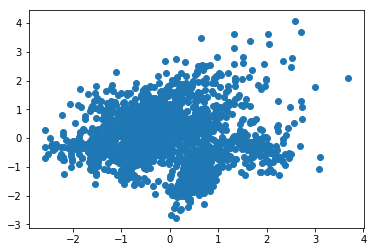

In [13]:
plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.show()

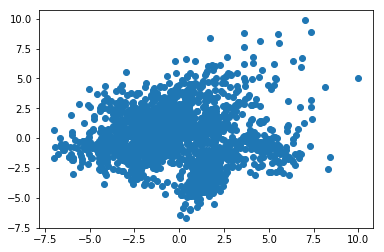

In [14]:
pca_nowhiten = PCA(n_components=0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:, 0], features_nowhiten[:, 1])
plt.show()

In [15]:
pca_nowhiten.components_.shape

(54, 64)

In [16]:
import numpy as np

np.allclose(features_nowhiten, np.dot(features, pca_nowhiten.components_.T))

True

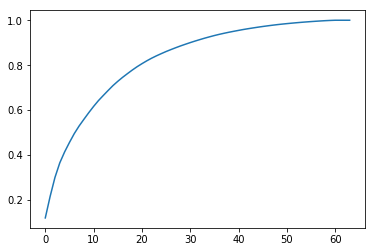

In [17]:
pca = PCA(whiten=True).fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

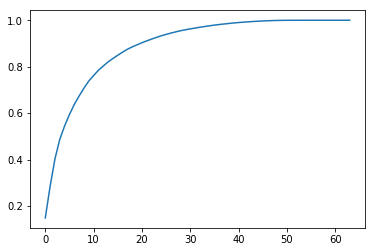

In [18]:
# 표준화하지 않은 원본 데이터를 사용합니다.
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

## 9.2 선형적으로 구분되지 않는 데이터의 차원을 축소하기

In [19]:
# 라이브러리를 임포트합니다.
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

# 선형적으로 구분되지 않는 데이터를 만듭니다.
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

# 방사 기저 함수(radius basis function, RBF)를 사용하여 커널 PCA를 적용합니다.
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kpca.shape[1])

원본 특성 개수: 2
줄어든 특성 개수: 1


## 붙임

In [20]:
kpca.components_

AttributeError: 'KernelPCA' object has no attribute 'components_'

## 9.3 클래스 분리를 최대화함으로써 특성을 줄이기

In [21]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 붓꽃 데이터셋을 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# LDA 객체를 만들고 실행하여 특성을 변환합니다.
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)

# 특성 개수를 출력합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_lda.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 1


In [22]:
lda.explained_variance_ratio_

array([0.9912126])

In [23]:
# LDA를 만들고 실행합니다.
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)

# 설명된 분산의 비율이 담긴 배열을 저장합니다.
lda_var_ratios = lda.explained_variance_ratio_

# 함수를 만듭니다.
def select_n_components(var_ratio, goal_var: float) -> int:
    # 설명된 분산의 초기값을 지정합니다.
    total_variance = 0.0

    # 특성 개수의 초깃값을 지정합니다.
    n_components = 0

    # 각 특성의 설명된 분산을 순회합니다.
    for explained_variance in var_ratio:

        # 설명된 분산 값을 누적합니다.
        total_variance += explained_variance

        # 성분 개수를 카운트합니다.
        n_components += 1

        # 설명된 분산이 목표치에 도달하면 
        if total_variance >= goal_var:
            # 반복을 종료합니다.
            break

    # 성분 개수를 반환합니다.
    return n_components

# 함수를 실행합니다.
select_n_components(lda_var_ratios, 0.95)

1

## 9.4 행렬 분해를 사용하여 특성을 줄이기

In [24]:
# 라이브러리를 임포트합니다.
from sklearn.decomposition import NMF
from sklearn import datasets

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 로드합니다.
features = digits.data

# NMF를 만들고 학습하고 적용합니다.
nmf = NMF(n_components=10, random_state=1)
features_nmf = nmf.fit_transform(features)

# 결과를 출력합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_nmf.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


## 붙임

In [25]:
nmf.components_.shape

(10, 64)

In [26]:
np.all(nmf.components_ >= 0)

True

In [27]:
np.mean(features - np.dot(features_nmf, nmf.components_))

-0.20062043744127928

In [28]:
nmf_mu = NMF(n_components=10, solver='mu', random_state=1)
features_nmf_mu = nmf_mu.fit_transform(features)

In [29]:
np.mean(features - np.dot(features_nmf_mu, nmf_mu.components_))

-0.12629945585681077

## 9.5 희소한 데이터의 특성을 줄이기

In [30]:
# 라이브러리를 임포트합니다.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 표준화 처리합니다.
features = StandardScaler().fit_transform(digits.data)

# 희소 행렬을 만듭니다.
features_sparse = csr_matrix(features)

# TSVD 객체를 만듭니다.
tsvd = TruncatedSVD(n_components=10)

# 희소 행렬에 TSVD를 적용합니다.
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

# 결과를 출력합니다.
print("원본 특성 개수:", features_sparse.shape[1])
print("줄어든 특성 개수:", features_sparse_tsvd.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


In [31]:
# 특성 개수보다 하나 작은 TSVD를 만들고 실행합니다.
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)

# 설명된 분산을 리스트에 저장합니다.
tsvd_var_ratios = tsvd.explained_variance_ratio_

# 함수를 만듭니다.
def select_n_components(var_ratio, goal_var):
    # 설명된 분산을 초기화합니다.
    total_variance = 0.0

    # 특성 개수를 초기화합니다.
    n_components = 0

    # 특성의 설명된 분산을 순환합니다.
    for explained_variance in var_ratio:

        # 설명된 분산을 누적합니다.
        total_variance += explained_variance

        # 성분 개수를 카운트합니다.
        n_components += 1

        # 설명된 분산의 목표에 도달하면
        if total_variance >= goal_var:
            # 반복을 마칩니다.
            break

    # 성분 개수를 반환합니다.
    return n_components

# 함수를 실행합니다.
select_n_components(tsvd_var_ratios, 0.95)

40

## 붙임

In [32]:
features = digits.data - np.mean(digits.data, axis=0)

pca = PCA(n_components=40)
features_pca = pca.fit_transform(features)

In [33]:
tsvd = TruncatedSVD(n_components=40)
features_tsvd = tsvd.fit_transform(features)

In [34]:
np.max(np.abs(features_pca - features_tsvd))

0.051606331617479295